In [1]:
# import jax
# import jax.numpy as jnp

# jax.config.update("jax_compilation_cache_dir", "./jax-caches")
# jax.config.update("jax_persistent_cache_min_entry_size_bytes", -1)
# jax.config.update("jax_persistent_cache_min_compile_time_secs", 0)

In [2]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../"))

# os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.25"
# os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
# os.environ["XLA_FLAGS"] = (
#     "--xla_disable_hlo_passes=constant_folding "  # this disables constant folding
#     # "--xla_cpu_use_thunk_runtime=false "
# )
from desc import set_device
set_device("gpu")

In [3]:
# import jax
# import jax.numpy as jnp

# jax.config.update("jax_explain_cache_misses", True)

In [4]:
# from desc import set_device, _set_cpu_count

# num_device = 2
# _set_cpu_count(num_device)
# set_device("cpu", num_device=num_device)

In [5]:
import numpy as np
np.set_printoptions(linewidth=np.inf, precision=4, suppress=True, threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import functools
import scipy

In [6]:
import desc

from desc.basis import *
from desc.backend import *
from desc.compute import *
from desc.coils import *
from desc.equilibrium import *
from desc.examples import *
from desc.grid import *
from desc.geometry import *
from desc.io import *

from desc.objectives import *
from desc.objectives.objective_funs import *
from desc.objectives.getters import *
from desc.objectives.normalization import compute_scaling_factors
from desc.objectives.utils import *
from desc.optimize._constraint_wrappers import *

from desc.transform import Transform
from desc.plotting import *
from desc.optimize import *
from desc.perturbations import *
from desc.profiles import *
from desc.compat import *
from desc.utils import *
from desc.magnetic_fields import *

from desc.__main__ import main
from desc.vmec_utils import vmec_boundary_subspace
from desc.input_reader import InputReader
from desc.continuation import solve_continuation_automatic
from desc.compute.data_index import register_compute_fun
from desc.optimize.utils import solve_triangular_regularized

print_backend_info()

DESC version=0.15.0+435.gd8cb3406e.
Using JAX backend: jax version=0.6.2, jaxlib version=0.6.2, dtype=float64.
Using device: NVIDIA GeForce RTX 4080 Laptop GPU (id=0), with 11.99 GB available memory.


# 1D

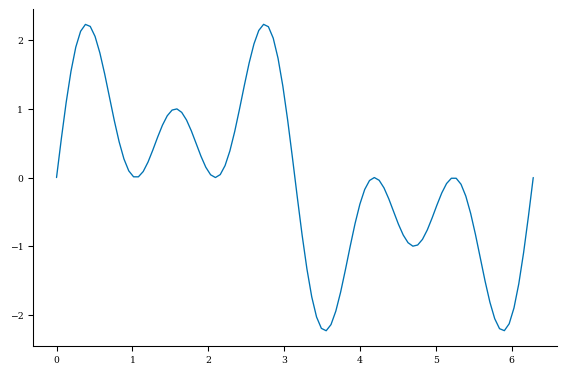

In [193]:
def f(x):
    """1D periodic function."""
    return np.sin(x) + np.sin(3 * x) + np.sin(5 * x)

xd = np.linspace(0, 2*np.pi, 100)
plt.plot(xd, f(xd));

In [194]:
N = 64
xk = np.linspace(0, 2*np.pi, N)
yk = f(xk)
xm = np.fft.fft(yk)
x = np.fft.ifft(xm)

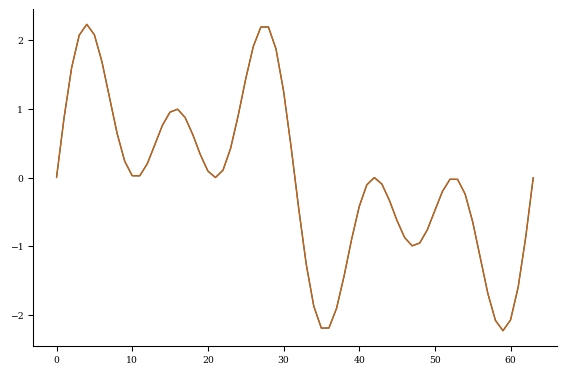

In [195]:
plt.plot(yk)
plt.plot(x.real);

# 2D

In [196]:
def plot_2d_surface(x, y, z):
    """Plot data on a surface using a 3D plot."""
    fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale="Viridis", opacity=1)])
    fig.update_layout(
        title="Plotly Interactive 3D Surface Plot",
        scene=dict(
            xaxis_title="X", yaxis_title="Y", zaxis_title="Z", aspectmode="data"
        ),
        width=800,
        height=800,
    )
    return fig

In [197]:
def f2(x, y):
    """2D periodic function."""
    return 2*np.sin(x*y)

x = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(x, x)
z = f2(X, Y)
plot_2d_surface(X, Y, z)

In [198]:
N = 64
x = np.linspace(0, 2 * np.pi, N)
X, Y = np.meshgrid(x, x)
zk = f2(X, Y)
# take the FFT of the data
# order doesn't matter
zm = np.fft.fft(zk, axis=1)
zmn = np.fft.fft(zm, axis=0)

# go back to time domain with 2 inverse FFTs
# order doesn't matter
zm = np.fft.ifft(zmn, axis=0)
z = np.fft.ifft(zm, axis=1)
plot_2d_surface(X, Y, z.real)

# Chebyshew Transform

In [209]:
def f_np(x):
    """Non-periodic 1D function."""
    return x**2 + x

In [210]:
N = 16
k = np.arange(N)
x = (np.cos(k*np.pi/(N-1)) + 1)/2

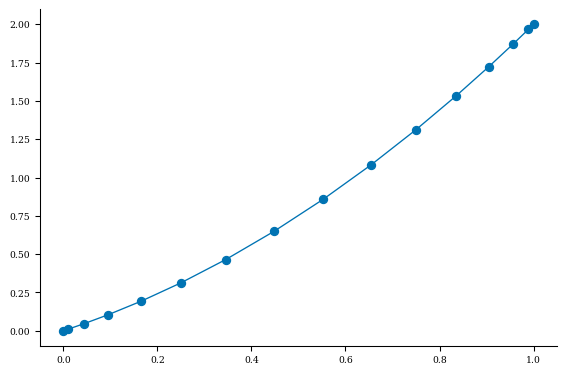

In [211]:
y = f_np(x)
plt.plot(x, y)
plt.scatter(x, y);

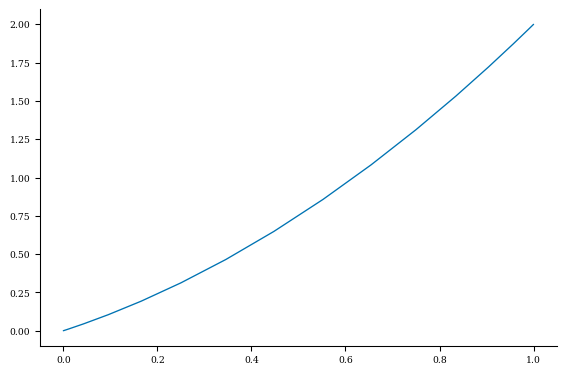

In [ ]:
a = np.fft.rfft(y)
plt.plot(x, np.fft.irfft(a))